# Lab 1: Tools of the trade

## Markdown Cells

This is a [Markdown](https://en.wikipedia.org/wiki/Markdown) cell. You can use them to write *nicely* formatted text, describing what you are doing in the Jupyter notebook.

- step 1: do thing 1
- step 2: do thing 2, of course
    - step 2b: a finer point


In [13]:
''' 
Let's import the Python modules we'll need for this example!
This normally goes at the top of your script or notebook, so that all code below it can see these packages.


By the way, the triple-quotes give you blocks of comments. Useful for commenting out large chunks of things
'''
# while the pound (or hash) symbol just comments things on the same line

# some magic to make plots appear IN the notebook (not pop out like normal matplotlib)
%matplotlib inline 

import numpy as np # our basic math/numbers library
import matplotlib
import math
import matplotlib.pyplot as plt # the standard plotting package
import pandas as pd # PANDAS: a data science and analysis package we'll use all Quarter!!
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 11
plt.rcParams['legend.fontsize'] = 14

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

In [2]:
# Let's read some data in!

# file from: http://ds.iris.edu/ds/products/emc-prem/
# based on Dziewonski & Anderson (1981) http://adsabs.harvard.edu/abs/1981PEPI...25..297D

file = 'PREM_1s.csv'

# use Pandas to read the CSV file. This is the easiest case scenario, a nicely formatted file!
# we read this into a Pandas "Dataframe" (basically a spreadsheet)
df = pd.read_csv(file)

In [3]:
# the notebook knows how to make the dataframe look nice:
df

,radius,depth,density,Vpv,Vph,Vsv,Vsh,eta,Q-mu,Q-kappa
0,6371.0,0.0,1.02000,1.45000,1.45000,0.00000,0.00000,1.00000,0.0,57823.0
1,6370.0,1.0,1.02000,1.45000,1.45000,0.00000,0.00000,1.00000,0.0,57823.0
2,6369.0,2.0,1.02000,1.45000,1.45000,0.00000,0.00000,1.00000,0.0,57823.0
3,6368.0,3.0,1.02000,1.45000,1.45000,0.00000,0.00000,1.00000,0.0,57823.0
4,6368.0,3.0,2.60000,5.80000,5.80000,3.20000,3.20000,1.00000,600.0,57823.0
5,6367.0,4.0,2.60000,5.80000,5.80000,3.20000,3.20000,1.00000,600.0,57823.0
6,6366.0,5.0,2.60000,5.80000,5.80000,3.20000,3.20000,1.00000,600.0,57823.0
7,6365.0,6.0,2.60000,5.80000,5.80000,3.20000,3.20000,1.00000,600.0,57823.0
8,6364.0,7.0,2.60000,5.80000,5.80000,3.20000,3.20000,1.00000,600.0,57823.0
9,6363.0,8.0,2.60000,5.80000,5.80000,3.20000,3.20000,1.00000,600.0,57823.0


In [4]:
# Here is one column of the data, called by name. Handy!
df['radius']

0      6371.0
1      6370.0
2      6369.0
3      6368.0
4      6368.0
5      6367.0
6      6366.0
7      6365.0
8      6364.0
9      6363.0
10     6362.0
11     6361.0
12     6360.0
13     6359.0
14     6358.0
15     6357.0
16     6356.0
17     6356.0
18     6355.0
19     6354.0
20     6353.0
21     6352.0
22     6351.0
23     6350.0
24     6349.0
25     6348.0
26     6346.6
27     6346.6
28     6346.0
29     6345.0
        ...  
169    2500.0
170    2400.0
171    2300.0
172    2221.5
173    2200.0
174    2100.0
175    2000.0
176    1900.0
177    1800.0
178    1700.0
179    1600.0
180    1500.0
181    1400.0
182    1300.0
183    1221.5
184    1221.5
185    1217.1
186    1200.0
187    1100.0
188    1000.0
189     900.0
190     800.0
191     700.0
192     600.0
193     500.0
194     400.0
195     300.0
196     200.0
197     100.0
198       0.0
Name: radius, Length: 199, dtype: float64

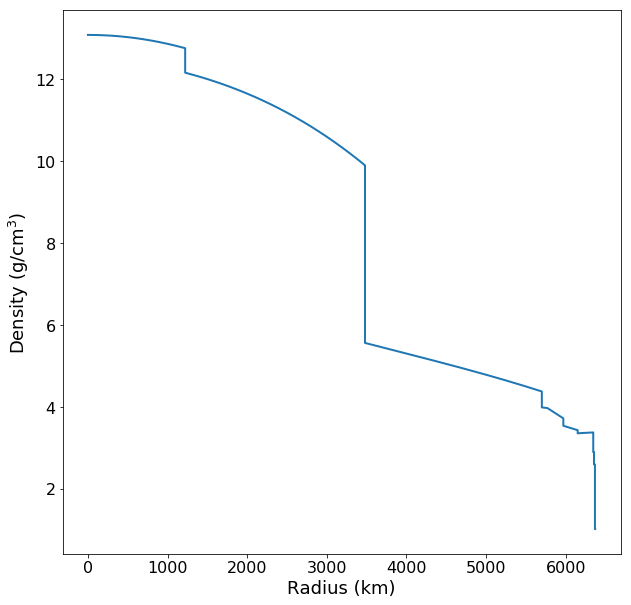

In [8]:
# Now let's plot some data

# note you don't have to say plt.figure(), like normal. But you can if you want...
plt.plot(df['radius'], df['density'])

plt.xlabel('Radius (km)')
plt.ylabel('Density (g/cm$^3$)')

# and you don't have to say plt.show() either

## Goal:
At what radial step do you enclose half of the Earth's mass?

We all know the formula for the mass of a sphere:
$ M = \frac{4}{3} \pi R^3 \times \rho $

Note that the density here is provided in *shells* of radius, so you need to add them as you go.

$ M_i = \frac{4}{3} \pi (R_{i+1}^3 - R_i^3) \times \rho_i $


In [26]:
r=df['radius']
rho=df['density']

In [77]:
# some beginning thoughts...

# create an array of 100 zeros
m = np.zeros(np.size(r))

# loop over these, and save something in each one
for i in range(0, np.size(r)-1):
    m[i] = (4/3)*np.pi*(r[i]**3 - r[i+1]**3)*rho[i]

In [78]:
m_enc=np.cumsum(m) #cumulative summation of the masses in each shell
m_tot=np.sum(m) #total sum of body's mass

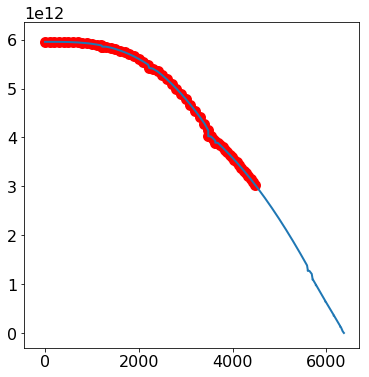

In [90]:
z = np.where((m_enc > .5*m_tot))[0] #must put the extra dimension [0]

plt.figure(figsize=(6,6)) # a handy way to adjust the figure shape/size (units are inches)
plt.plot(r, m_enc)
plt.scatter(r[z], m_enc[z], c='red', lw=0)

In [96]:
# I don't know how to find the right-most data point's x value, which would give me the radius that encloses
# half the earth's mass

r_half = np.where((m_enc < .5*m_tot+1) & (m_enc > .5*m_tot-1))

In [99]:
r_half

(array([], dtype=int64),)